In [1]:
#Handwritten classification using CNN

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Metal device set to: Apple M1 Pro


2023-05-15 09:57:26.184181: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 09:57:26.184325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


2023-05-15 09:57:26.838811: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-15 09:57:27.070226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.1379 - accuracy: 0.9571

2023-05-15 09:57:43.190709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1378 - accuracy: 0.9571 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0363 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0280 - val_accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0272 - val_accuracy: 0.9919


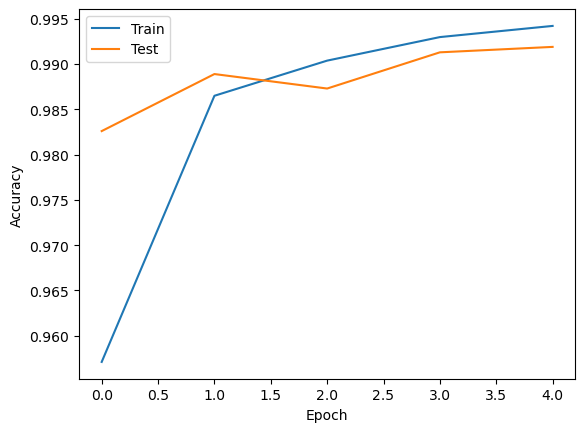

In [7]:
import matplotlib.pyplot as plt

#Plotting
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

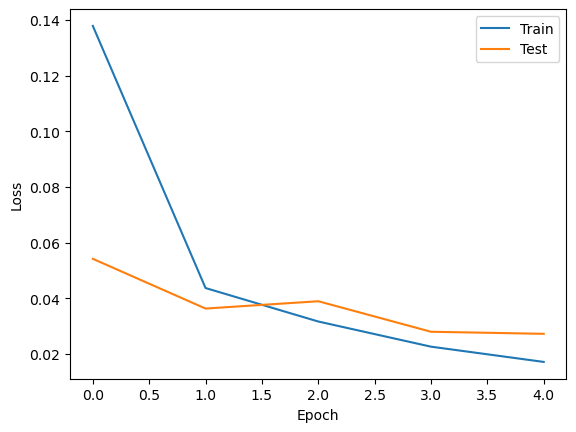

In [8]:
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
print("Accuracy:", hist.history['accuracy'][-1])

Accuracy: 0.9942166805267334
